# Amazon Review Classification

### Areas of improvement:
- Define functions to optimize repeat code
- Utilize High Performance Computing to run more complex models

In [2]:
#dependencies
import numpy as np
import pandas as pd
import datetime

In [3]:
train = pd.read_csv('train.csv')
pd.read_csv('train.csv')

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style,category,id
0,1,False,"11 12, 2016",C413C78E10E54C5DB41837889F36C1E8,565D194F38B1CC3F806EE677C61F639C,465E154EC79AFFAB5EB2607198B21433,all of the reviews for this product are fake.,"All fake reviews, beware.",1478908800,2.0,NaN,{'Size:': ' Polaris H4'},automotive,ab0
1,1,True,"12 6, 2016",490AE37808EFEE3AF4FE6DEBDEB5A4C8,0D66512A0A7F580523AB996378DF0F14,760C63E8E5E8DC3FAA01878D37BA5678,wrong part. our fault.,One Star,1480982400,NaN,NaN,NaN,automotive,ab1
2,1,True,"09 17, 2014",74A9FA5A64449BEE2A2E8E3F62872F0F,A0E45600FF2C5A779CB4314F379C253A,C6E4DD5C1C4EC09E90182644ED6CA9EF,this wire set it really sucks!!!,One Star,1410912000,NaN,NaN,NaN,automotive,ab2
3,1,True,"06 11, 2016",EB561158A2829D98B467FE03CC1E45F1,37AB9A82470595E0ACB88BAC48C150EE,F4892A77EA45C52F40AB17ED537EF9FF,"first use, it leaked instantly. even at 5 buck...",One Star,1465603200,NaN,NaN,"{'Color:': ' Clear', 'Style:': ' 45 Degree'}",automotive,ab3
4,1,True,"12 23, 2017",5045D801332850D21618DD13A697CD9B,5772FF30428EEB8E0258C1A53CA2EC50,522F0BBFF2B47F1D63FF781A0AB1D079,didn't fit,One Star,1513987200,NaN,NaN,NaN,automotive,ab4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,5,True,"03 20, 2015",24A0B29940152C574DA401347CE47E7A,CD83ED06223FE876323282B57209D765,1B5F1A160CB115EB26D0651E5BF59BE9,this is the same plush toy that the official d...,"Well constructed, very soft",1426809600,NaN,NaN,NaN,toys,ab29184
29185,5,True,"05 15, 2014",AD3FD1D6499FA73ACBCBB39F89EE5BF9,3625ADD67F860057FD15B71FD0389264,C8DC85A8F6B8527735AF7FA6182BB209,"my grandson loved this. it is a great toy, he ...",Fun toy,1400112000,NaN,NaN,NaN,toys,ab29185
29186,5,True,"11 13, 2017",24C8C33C6FD8ACCAFE2EC1D1FC4DBF05,0C0DF58B2AC0350731C4146D32DBD3F0,951CEFD3CA5CB6773251E773379FF26A,my kiddo loves them! we are a rock climbing fa...,and now the play set has a nice climbing feature,1510531200,NaN,NaN,NaN,toys,ab29186
29187,5,True,"01 02, 2018",E313EE1C17E5E553343F50BBC95BB2C2,9C9D7AAF41631F1096FE10FBA18B6029,F5A4D2A1C2A0CAD7BBC378CB10CB410C,i bought this for my niece (age 2) and mailed ...,my brother said she liked it and I haven't see...,1514851200,NaN,NaN,{'Style:': ' Standard Version'},toys,ab29187


In [4]:
#load in data
train = pd.read_csv('train.csv')

#one hot encode image info as a binary variable if one was uploaded or not
train.loc[train["image"].notna(), "image"] = 1
train.loc[train["image"].isna(), "image"] = 0

#one hot encode verified as a binary variable
train.loc[train["verified"] == True, "verified"] = 1
train.loc[train["verified"] == False, "verified"] = 0

#convert reviews with no votes to a score of zero
train.loc[train["vote"].isna(), "vote"] = 0

/var/folders/q6/0jgt4bx133j68qvp3vmw3yd40000gn/T/ipykernel_54076/3805431328.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  train.loc[train["verified"] == True, "verified"] = 1


In [5]:
#split reviewTime string into its componenets: month, day, year
date = train.reviewTime.str.replace('  ', ' ')
date = date.str.replace(',', '')
date = date.str.split(' ')

#select only the columns which contain viable information
train = train[['overall','verified','reviewText','summary','vote','image']]

#get weekday from split reviewTime 
def weekday_conversion(split_date):
    year = int(split_date[2])
    month = int(split_date[0])
    day = int(split_date[1])
    date = datetime.date(year, month, day)
    weekday = date.weekday()
    return weekday

#add one hot encoded weekday columns to train df
weekday = date.apply(weekday_conversion)
weekday_dummies = pd.get_dummies(weekday)
weekday_dummies = weekday_dummies.astype(int)
weekday_dict = {0:'Mo',1:'Tu',2:'We',3:'Th',4:'Fr',5:'Sa',6:'Su'}
weekday_dummies = weekday_dummies.rename(columns=weekday_dict)
train = pd.concat([train, weekday_dummies], axis=1)

train

,overall,verified,reviewText,summary,vote,image,Mo,Tu,We,Th,Fr,Sa,Su
0,1,0,all of the reviews for this product are fake.,"All fake reviews, beware.",2.0,0,0,0,0,0,0,1,0
1,1,1,wrong part. our fault.,One Star,0.0,0,0,1,0,0,0,0,0
2,1,1,this wire set it really sucks!!!,One Star,0.0,0,0,0,1,0,0,0,0
3,1,1,"first use, it leaked instantly. even at 5 buck...",One Star,0.0,0,0,0,0,0,0,1,0
4,1,1,didn't fit,One Star,0.0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29184,5,1,this is the same plush toy that the official d...,"Well constructed, very soft",0.0,0,0,0,0,0,1,0,0
29185,5,1,"my grandson loved this. it is a great toy, he ...",Fun toy,0.0,0,0,0,0,1,0,0,0
29186,5,1,my kiddo loves them! we are a rock climbing fa...,and now the play set has a nice climbing feature,0.0,0,1,0,0,0,0,0,0
29187,5,1,i bought this for my niece (age 2) and mailed ...,my brother said she liked it and I haven't see...,0.0,0,0,1,0,0,0,0,0


In [6]:
#split into training and validation set
from sklearn import model_selection
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(train.loc[:, train.columns != "overall"], train['overall'], test_size=0.2, random_state=5)

In [7]:
#attempted to have model consider weekday of review as a variable (this lowered accuracy and was therefore commented out)

#import scipy

#weekday_ohc = scipy.sparse.csr_matrix(X_train[[0,1,2,3,4,5,6]].astype(int))
#X_train_tf = hstack((X_train_tf,weekday_ohc))
#weekday_ohc = scipy.sparse.csr_matrix(X_validation[[0,1,2,3,4,5,6]].astype(int))
#X_validation_tf = hstack((X_validation_tf,weekday_ohc))

In [8]:
#count occurence of each word in review text and summary text
from sklearn.feature_extraction.text import CountVectorizer
count_vect_review = CountVectorizer(ngram_range=(1,2)) #bigrams used
count_vect_summary = CountVectorizer(ngram_range=(1,2))
X_train_reviewText_counts = count_vect_review.fit_transform(X_train.reviewText)
X_train_summary_counts = count_vect_summary.fit_transform(X_train.summary.astype('U'))

#combine word counts into one matrix
from scipy.sparse import hstack
X_train_counts = hstack((X_train_reviewText_counts, X_train_summary_counts))

#convert word counts into frequencies
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

#convert validation data into word counts, combine into one matrix, then convert into term frequency
X_validation_reviewText_counts = count_vect_review.transform(X_validation.reviewText)
X_validation_summary_counts = count_vect_summary.transform(X_validation.summary.astype('U'))
X_validation_counts = hstack((X_validation_reviewText_counts, X_validation_summary_counts))
X_validation_tf = tf_transformer.transform(X_validation_counts)

In [9]:
#perform sames steps as previous chunk, this time exlcuding stop words and using monograms
count_vect_review_no_stop = CountVectorizer(stop_words='english')
count_vect_summary_no_stop = CountVectorizer(stop_words='english')
X_train_reviewText_counts_no_stop = count_vect_review_no_stop.fit_transform(X_train.reviewText)
X_train_summary_counts_no_stop = count_vect_summary_no_stop.fit_transform(X_train.summary.astype('U'))

X_train_counts_no_stop = hstack((X_train_reviewText_counts_no_stop, X_train_summary_counts_no_stop))

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts_no_stop)
X_train_tf_no_stop = tf_transformer.transform(X_train_counts_no_stop)

X_validation_reviewText_counts_no_stop = count_vect_review_no_stop.transform(X_validation.reviewText)
X_validation_summary_counts_no_stop = count_vect_summary_no_stop.transform(X_validation.summary.astype('U'))
X_validation_counts_no_stop = hstack((X_validation_reviewText_counts_no_stop, X_validation_summary_counts_no_stop))
X_validation_tf_no_stop = tf_transformer.transform(X_validation_counts_no_stop)

In [10]:
#sentiment analysis for training set

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import scipy

#load in sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#make a new column with the sentiment from reviews
X_train['sentiment'] = X_train['reviewText'].apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
X_train['positive_score'] = X_train['sentiment'].apply(lambda x: x['pos'])
X_train['negative_score'] = X_train['sentiment'].apply(lambda x: x['neg'])
X_train['neutral_score'] = X_train['sentiment'].apply(lambda x: x['neu'])
X_train['compound_score'] = X_train['sentiment'].apply(lambda x: x['compound'])

#make a new column with the sentiment from summary
X_train['sentiment_sum'] = X_train['summary'].astype('U').apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
X_train['positive_score_sum'] = X_train['sentiment_sum'].apply(lambda x: x['pos'])
X_train['negative_score_sum'] = X_train['sentiment_sum'].apply(lambda x: x['neg'])
X_train['neutral_score_sum'] = X_train['sentiment_sum'].apply(lambda x: x['neu'])
X_train['compound_score_sum'] = X_train['sentiment_sum'].apply(lambda x: x['compound'])

#select only necessary columns
X_train2 = X_train[['positive_score','negative_score','neutral_score','compound_score','positive_score_sum','negative_score_sum','neutral_score_sum','compound_score_sum']]
#add 1 to allow the Naive Bayes model to be fit (negative numbers don't work)
#this doesn't affect SVM's ability to find a linear boundary or XGBoost's ability to make hierarchal decisions
X_train2 = X_train2 + 1

#append these columns to the term frequency matrix
sparse_train2 = scipy.sparse.csr_matrix(X_train2)
train_tf_sentiment = hstack((X_train_tf, sparse_train2))

In [11]:
#sentiment analysis for validation set

#load in sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#make a new column with the sentiment from reviews
X_validation['sentiment'] = X_validation['reviewText'].apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
X_validation['positive_score'] = X_validation['sentiment'].apply(lambda x: x['pos'])
X_validation['negative_score'] = X_validation['sentiment'].apply(lambda x: x['neg'])
X_validation['neutral_score'] = X_validation['sentiment'].apply(lambda x: x['neu'])
X_validation['compound_score'] = X_validation['sentiment'].apply(lambda x: x['compound'])

#make a new column with the sentiment from summary
X_validation['sentiment_sum'] = X_validation['summary'].astype('U').apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
X_validation['positive_score_sum'] = X_validation['sentiment_sum'].apply(lambda x: x['pos'])
X_validation['negative_score_sum'] = X_validation['sentiment_sum'].apply(lambda x: x['neg'])
X_validation['neutral_score_sum'] = X_validation['sentiment_sum'].apply(lambda x: x['neu'])
X_validation['compound_score_sum'] = X_validation['sentiment_sum'].apply(lambda x: x['compound'])

#select only necessary columns
X_validation2 = X_validation[['positive_score','negative_score','neutral_score','compound_score','positive_score_sum','negative_score_sum','neutral_score_sum','compound_score_sum']]
#add 1 to allow the Naive Bayes model to be fit (negative numbers don't work)
#this doesn't affect SVM's ability to find a linear boundary or XGBoost's ability to make hierarchal decisions
X_validation2 = X_validation2 + 1

#append these columns to the term frequency matrix
sparse_train2 = scipy.sparse.csr_matrix(X_validation2)
validation_tf_sentiment = hstack((X_validation_tf, sparse_train2))

## Naive Bayes Model

In [12]:
#fit naive bayes model to data

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

#create hyperparameter dict
alpha = np.arange(0.01,1,0.01)
hyperparameters = dict(alpha=alpha)

#perform gridsearch to find optimal naive bayes model
mnb = MultinomialNB()
clf = GridSearchCV(mnb, hyperparameters)
best_model = clf.fit(X_train_tf, np.array(y_train))
clf = best_model

#print optimal hyperparameters
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best alpha: 0.03


### Analysis with Stop Words and without Sentiment

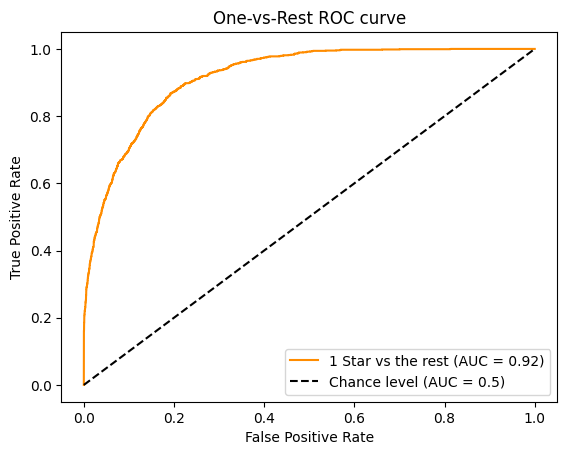

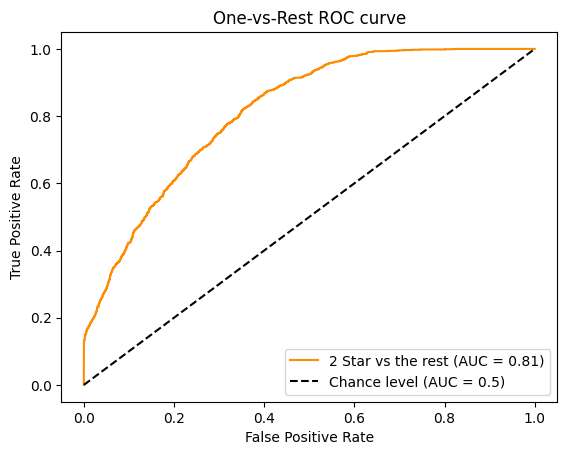

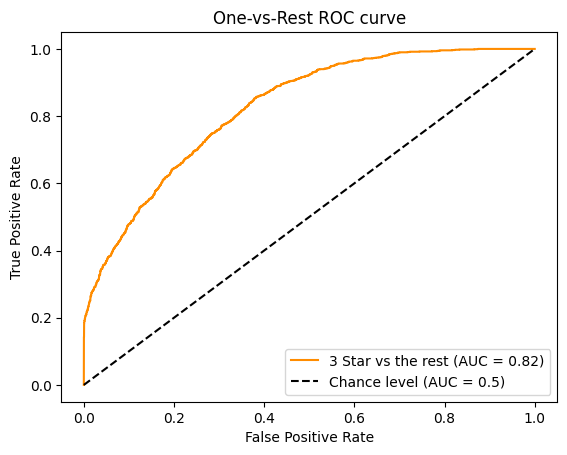

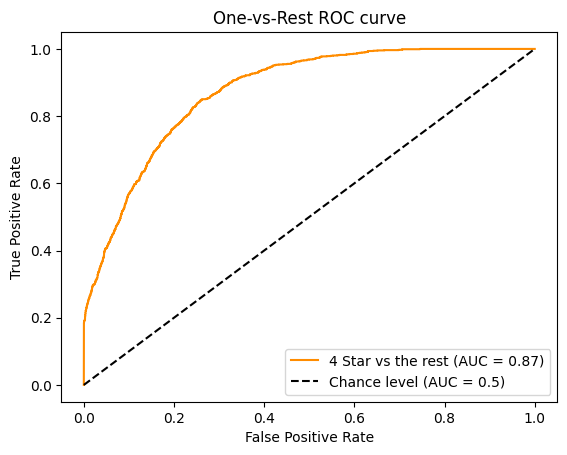

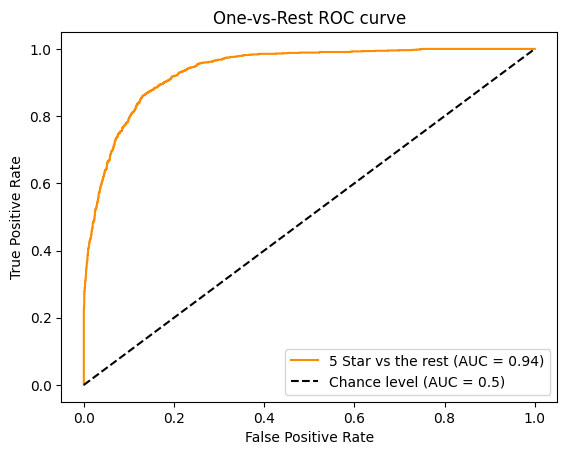

F1: 0.574421844052168
Accuracy: 0.5674888660500171


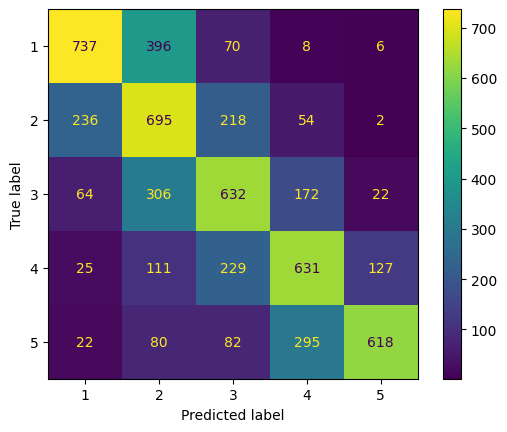

In [13]:
#perform analysis with naive bayes

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

#fit model with training set then make predictions for belonging to each class for validation data
y_score = clf.fit(X_train_tf, y_train).predict_proba(X_validation_tf)

#plot ROC curve for each outcome (1-5 star reviews)
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_validation)

for class_of_interest in [1,2,3,4,5]:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} Star vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()

#make predictions on validation set
y_predicted = clf.predict(X_validation_tf)

#assess performance on validation set with confusion matrix, F1 score and accuracy
conf_matrix = confusion_matrix(y_validation, y_predicted)
f1_macro = f1_score(y_validation, y_predicted, average='macro')
accuracy = accuracy_score(y_validation, y_predicted)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot()

print(f'F1: {f1_macro}')
print(f'Accuracy: {accuracy}')

In [14]:
from sklearn.model_selection import cross_val_score

#calculate F1 score with 5-fold cross validation on the training set of data
scores = cross_val_score(clf, X_train_tf, y_train, cv=5, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.58 accuracy with a standard deviation of 0.00


### Analysis without Stop Words and without Sentiment

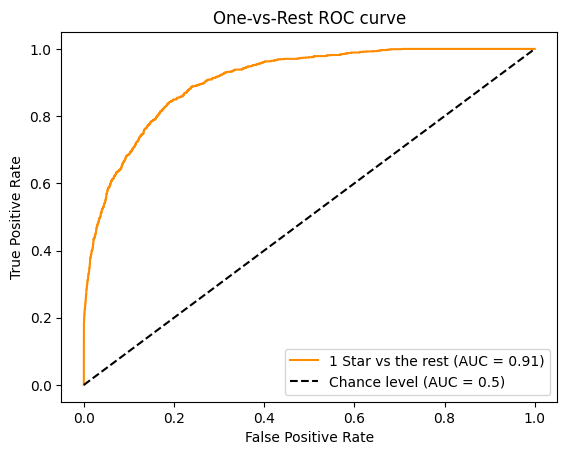

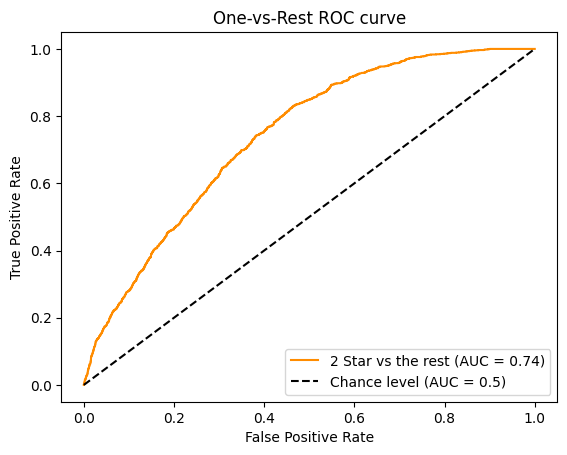

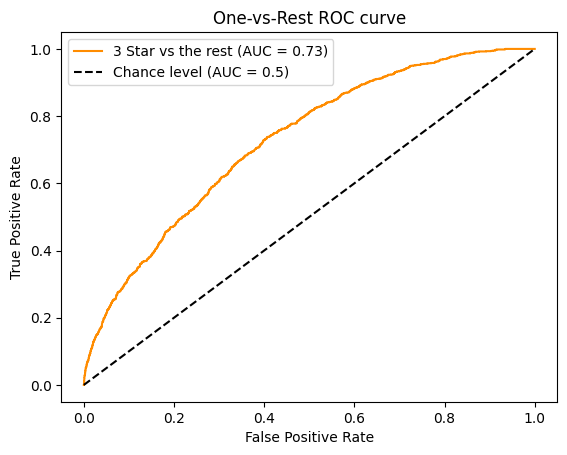

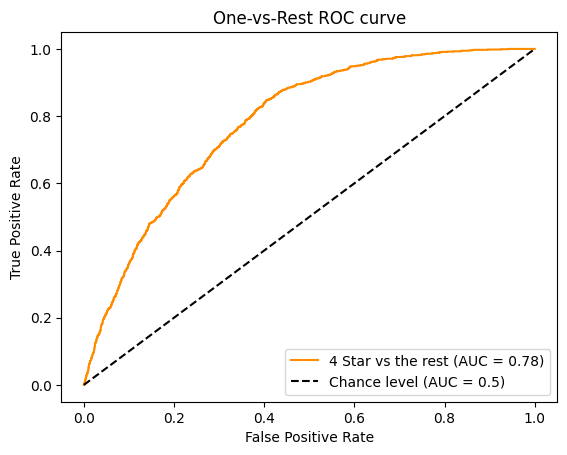

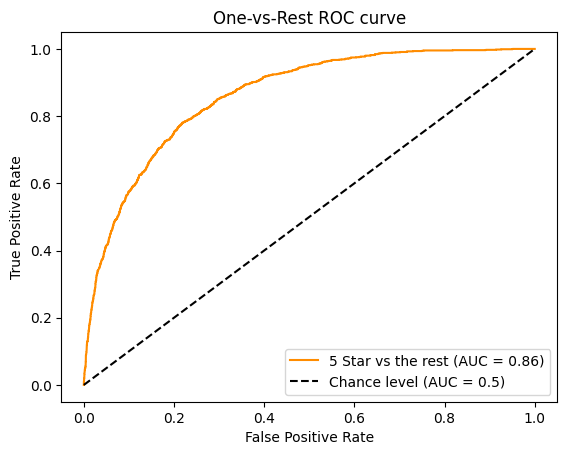

F1: 0.48246954783864043
Accuracy: 0.47944501541623846


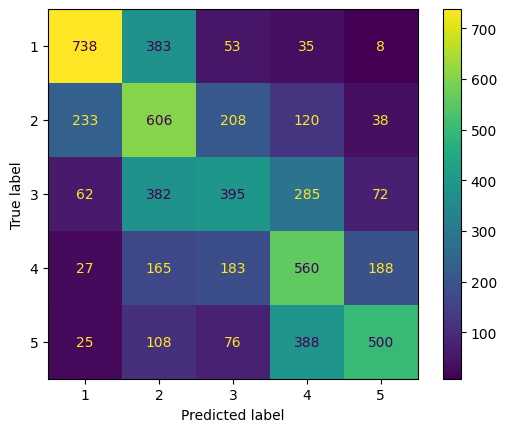

In [15]:
#fit model with training set then make predictions for belonging to each class for validation data
y_score = clf.fit(X_train_tf_no_stop, y_train).predict_proba(X_validation_tf_no_stop)

#plot ROC curve for each outcome (1-5 star reviews)
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_validation)

for class_of_interest in [1,2,3,4,5]:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} Star vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()

#make class predictions on validation set
y_predicted = clf.predict(X_validation_tf_no_stop)

#assess performance on validation set with confusion matrix, F1 score and accuracy
conf_matrix = confusion_matrix(y_validation, y_predicted)
f1_macro = f1_score(y_validation, y_predicted, average='macro')
accuracy = accuracy_score(y_validation, y_predicted)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot()

print(f'F1: {f1_macro}')
print(f'Accuracy: {accuracy}')

In [16]:
#5 fold cross validation with training data
scores = cross_val_score(clf, X_train_tf_no_stop, y_train, cv=5, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.48 accuracy with a standard deviation of 0.01


As discovered in prior analyses, the inclusion of stop words helps the model to make predictions, evidenced by the higher F1 Score and Accuracy when included. All subsequent analyses will therefore include stop words.

### Analysis with Stop Words and with Sentiment

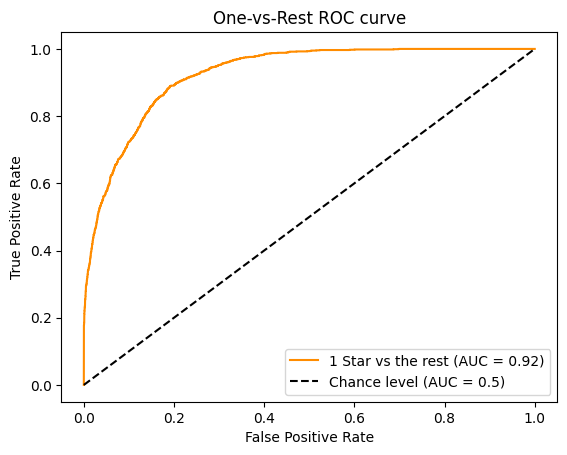

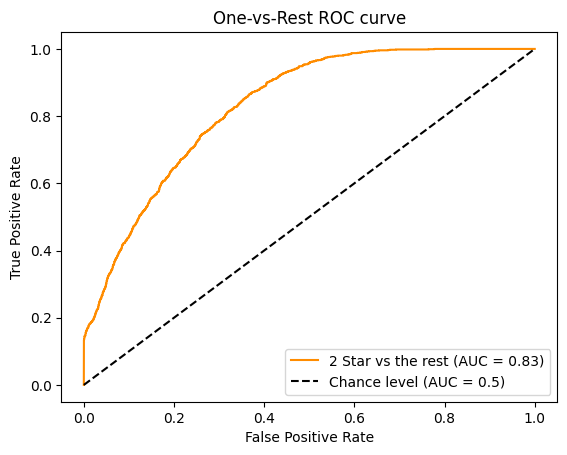

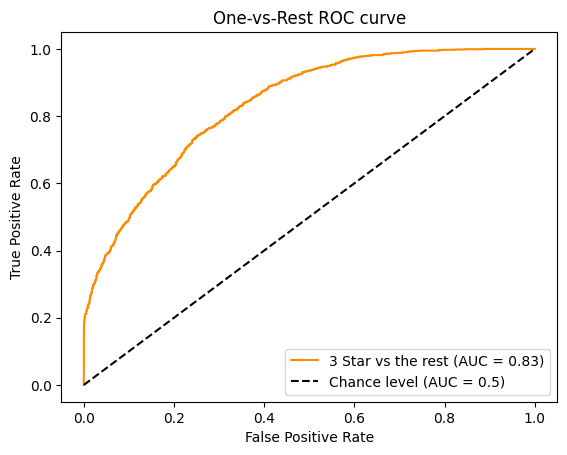

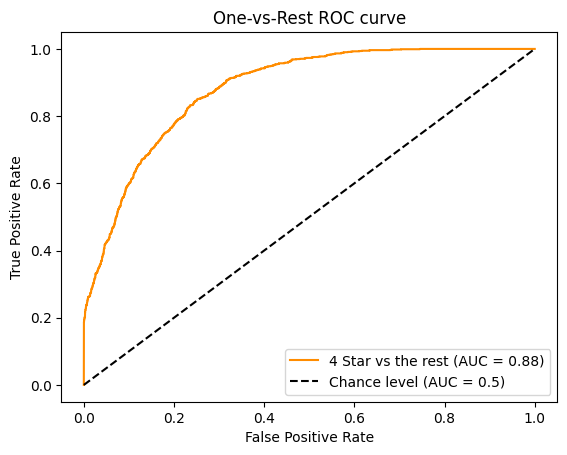

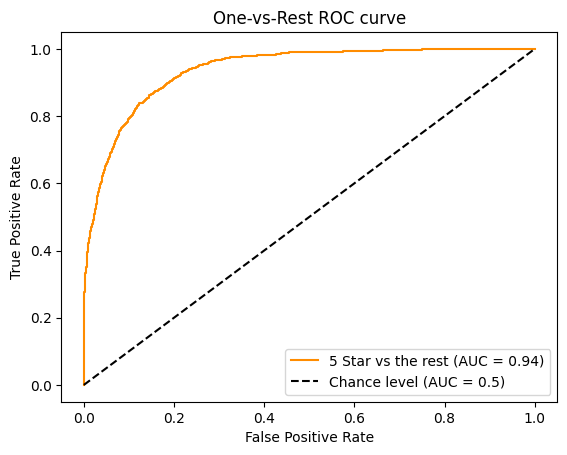

F1: 0.591718998884402
Accuracy: 0.5863309352517986


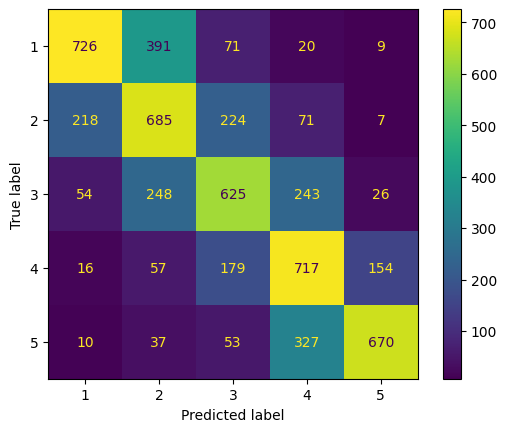

In [17]:
#fit model with training set then make predictions for belonging to each class for validation data
y_score = clf.fit(train_tf_sentiment, y_train).predict_proba(validation_tf_sentiment)

#plot ROC curve for each outcome (1-5 star reviews)
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_validation)


for class_of_interest in [1,2,3,4,5]:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} Star vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()

#make class predictions on validation set
y_predicted_nb = clf.predict(validation_tf_sentiment)

#assess performance on validation set with confusion matrix, F1 score and accuracy
conf_matrix = confusion_matrix(y_validation, y_predicted_nb)
f1_macro = f1_score(y_validation, y_predicted_nb, average='macro')
accuracy = accuracy_score(y_validation, y_predicted_nb)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot()

print(f'F1: {f1_macro}')
print(f'Accuracy: {accuracy}')

In [18]:
#5 fold cross validation with training data
scores = cross_val_score(clf, train_tf_sentiment, y_train, cv=5, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.01


## Support Vector Machine

In [19]:
#fit SVM to data
from sklearn.svm import LinearSVC

#create hyperparameter dict
penalty = ['l1', 'l2']
loss = ['hinge', 'squared_hinge']
hyperparameters = dict(penalty=penalty, loss=loss)

#perform gridsearch to find optimal SVM
svm = LinearSVC()
clf = GridSearchCV(svm, hyperparameters)
best_model = clf.fit(train_tf_sentiment, np.array(y_train))
clf = best_model

#print optimal hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best Loss:', best_model.best_estimator_.get_params()['loss'])

/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

Best Penalty: l2
Best Loss: squared_hinge


/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

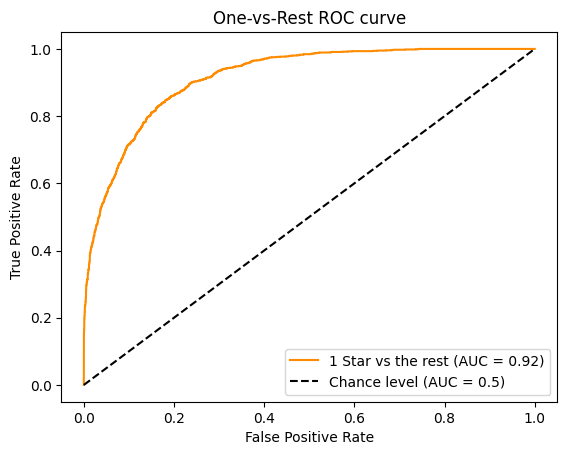

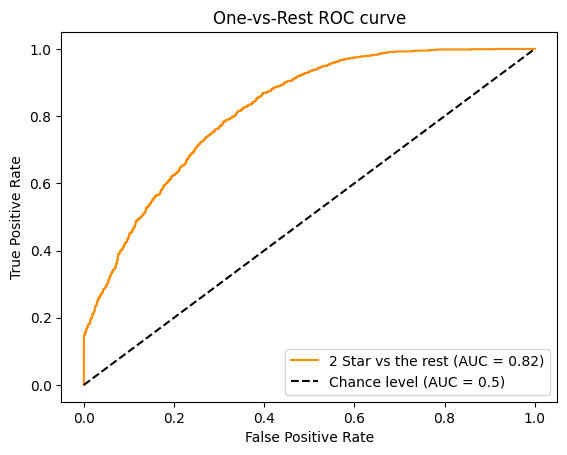

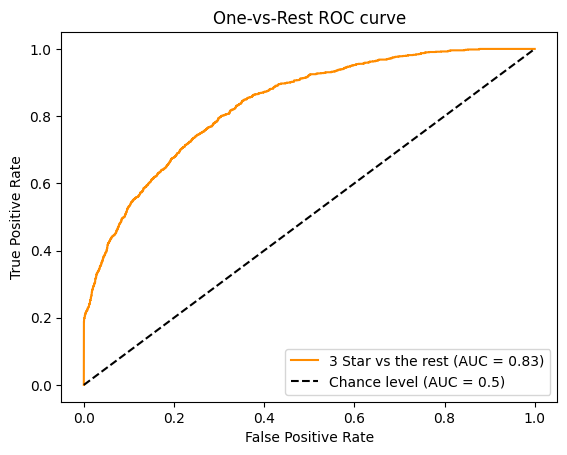

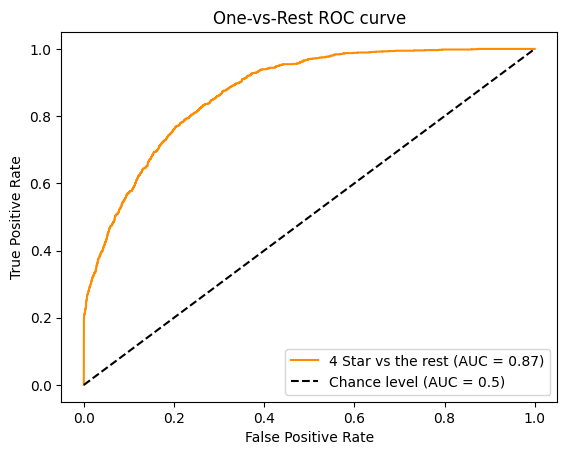

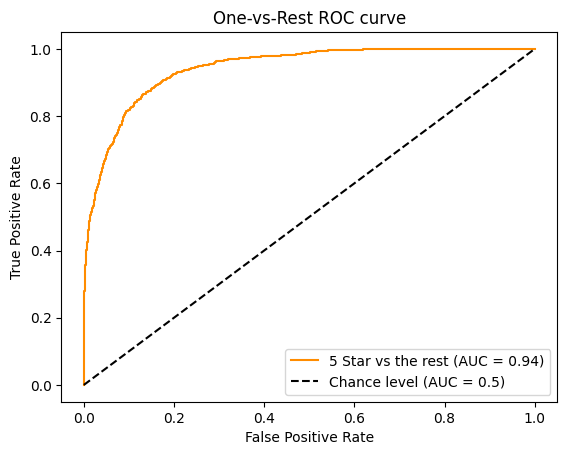

F1: 0.5945793933698951
Accuracy: 0.5954093867762933


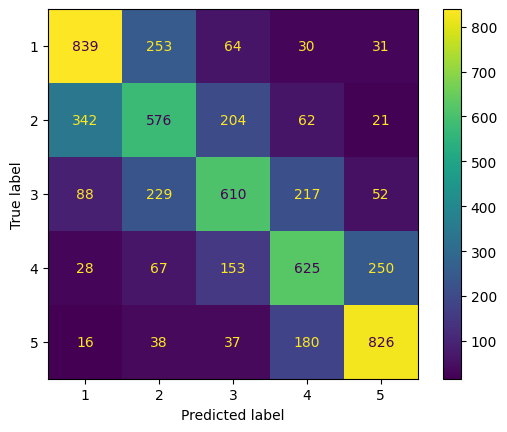

In [20]:
#perform analysis with SVM

from sklearn.calibration import CalibratedClassifierCV

#fit SVM to training data with best hyperparameters determine and predict class probabilities on validation data
svm = LinearSVC(loss='squared_hinge',penalty='l2')
clf = CalibratedClassifierCV(svm) 
y_score = clf.fit(train_tf_sentiment, y_train).predict_proba(validation_tf_sentiment)

#one vs all ROC curves
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_validation)

for class_of_interest in [1,2,3,4,5]:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} Star vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()


#make class predictions on validation set
y_predicted_svm = clf.predict(validation_tf_sentiment)

#assess performance on validation set with confusion matrix, F1 score and accuracy
conf_matrix = confusion_matrix(y_validation, y_predicted_svm)
f1_macro = f1_score(y_validation, y_predicted_svm, average='macro')
accuracy = accuracy_score(y_validation, y_predicted_svm)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot()

print(f'F1: {f1_macro}')
print(f'Accuracy: {accuracy}')

In [21]:
#5 fold cross validation
scores = cross_val_score(clf, train_tf_sentiment, y_train, cv=5, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Use

0.59 accuracy with a standard deviation of 0.00


## Ridge Classifier

In [22]:
#fit ridge classifier model to data
from sklearn.linear_model import RidgeClassifier

#create hyperparameter dict (performing this with a range of alphas was too computationally expensive)
alpha = [1.0]
hyperparameters = dict(alpha=alpha)

#perform gridsearch to find optimal ridge classifier model
rc = RidgeClassifier()
clf = GridSearchCV(rc, hyperparameters)
best_model = clf.fit(X_train_tf, np.array(y_train))
clf = best_model

#print optimal hyperparameters
print('Best alpha:', best_model.best_estimator_.get_params()['alpha'])

Best alpha: 1.0


In [ ]:
#perform analysis with SVM

from sklearn.calibration import CalibratedClassifierCV

#fit SVM to training data with best hyperparameters determined and predict class probabilities on validation data
svm = LinearSVC(loss='squared_hinge',penalty='l2')
clf = CalibratedClassifierCV(svm) 
y_score = clf.fit(train_tf_sentiment, y_train).predict_proba(validation_tf_sentiment)

#one vs all ROC curves
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_validation)

for class_of_interest in [1,2,3,4,5]:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} Star vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()


#make class predictions on validation set
y_predicted_svm = clf.predict(validation_tf_sentiment)

#assess performance on validation set with confusion matrix, F1 score and accuracy
conf_matrix = confusion_matrix(y_validation, y_predicted_svm)
f1_macro = f1_score(y_validation, y_predicted_svm, average='macro')
accuracy = accuracy_score(y_validation, y_predicted_svm)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot()

print(f'F1: {f1_macro}')
print(f'Accuracy: {accuracy}')

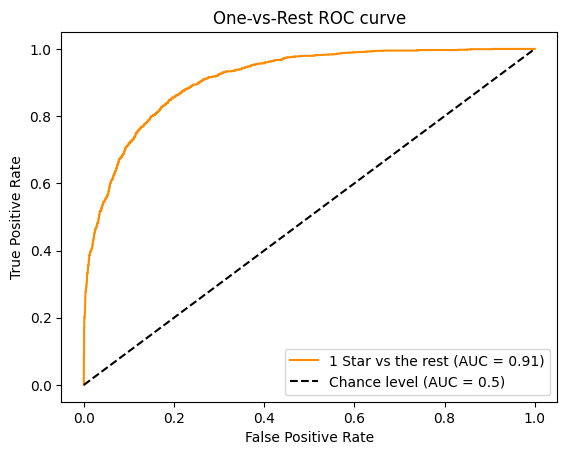

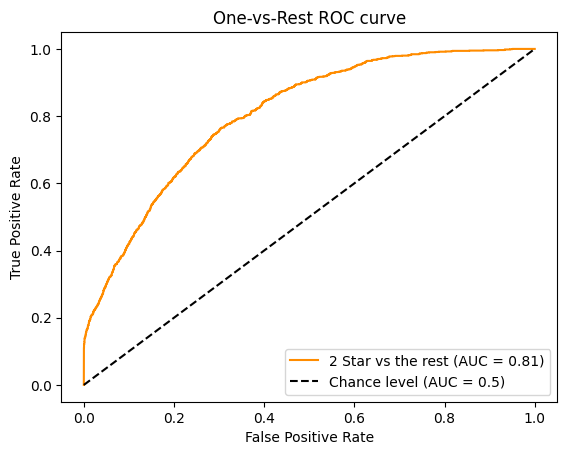

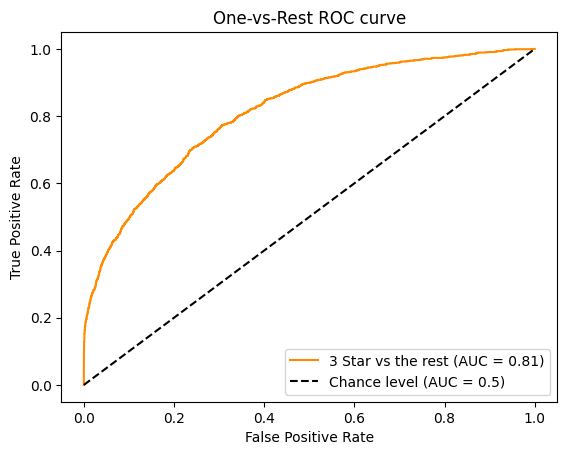

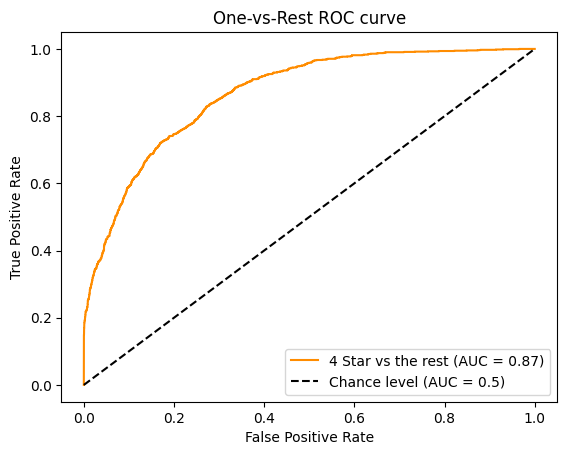

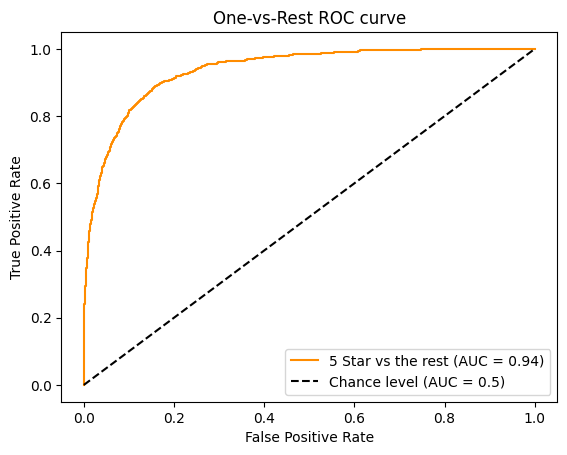

F1: 0.5926956646972349
Accuracy: 0.5950668036998972


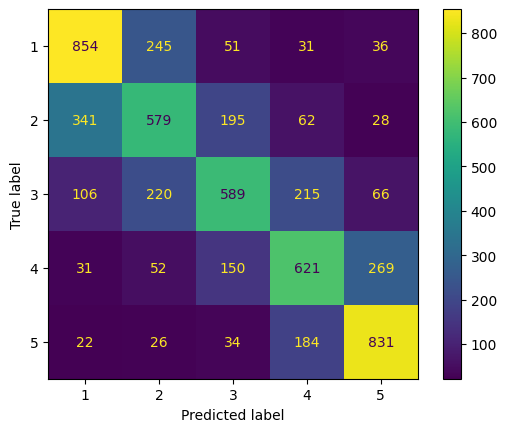

In [23]:
#perform analysis with ridge classifier

#fit ridge regression to training data and predict class probabilities on validation data
y_score = clf.fit(train_tf_sentiment, y_train).decision_function(validation_tf_sentiment)

#one vs all ROC curves
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_validation)


for class_of_interest in [1,2,3,4,5]:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} Star vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()

#make class predictions on validation set
y_predicted_rc = clf.predict(validation_tf_sentiment)

#assess performance on validation set with confusion matrix, F1 score and accuracy
conf_matrix = confusion_matrix(y_validation, y_predicted_rc)
f1_macro = f1_score(y_validation, y_predicted_rc, average='macro')
accuracy = accuracy_score(y_validation, y_predicted_rc)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot()

print(f'F1: {f1_macro}')
print(f'Accuracy: {accuracy}')

F1: 0.6009479376085036
Accuracy: 0.5986639260020555


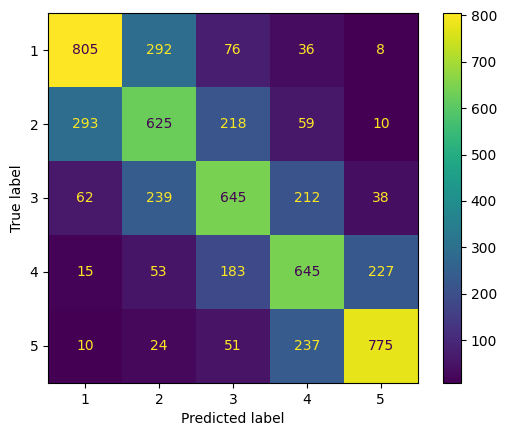

In [24]:
#aggregate the score of all 3 models to make a prediction
avg_predicted = np.around((y_predicted_nb + y_predicted_svm + y_predicted_rc)/3)

#assess performance on validation set with confusion matrix, F1 score and accuracy
f1_macro = f1_score(y_validation, avg_predicted, average='macro')
accuracy = accuracy_score(y_validation, avg_predicted)
conf_matrix = confusion_matrix(y_validation, avg_predicted)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[1,2,3,4,5]).plot()

print(f'F1: {f1_macro}')
print(f'Accuracy: {accuracy}')

## Gradient Boost

In [ ]:
#try a fourth model with only some of the data, as it takes too long to train with all of it
from sklearn.ensemble import GradientBoostingClassifier

#create hyperparameter dict
n_estimators = [100]
hyperparameters = dict(n_estimators=n_estimators)

#perform gridsearch to find optimal XGboost model
gb = GradientBoostingClassifier()
clf = GridSearchCV(gb, hyperparameters)
best_model = clf.fit(train_tf_sentiment[0:5000], np.array(y_train)[0:5000])
clf = best_model

#print optimal hyperparameters
print('Best alpha:', best_model.best_estimator_.get_params()['n_estimators'])

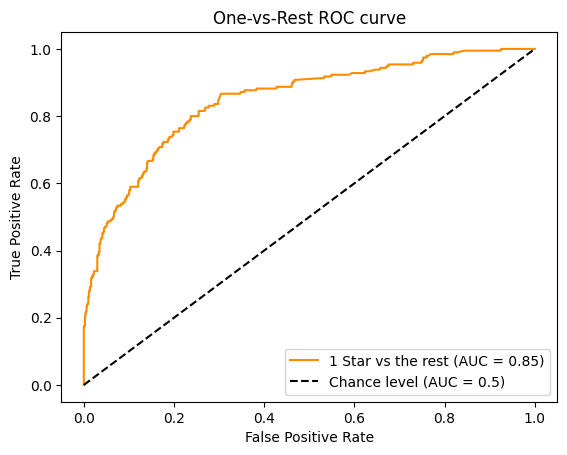

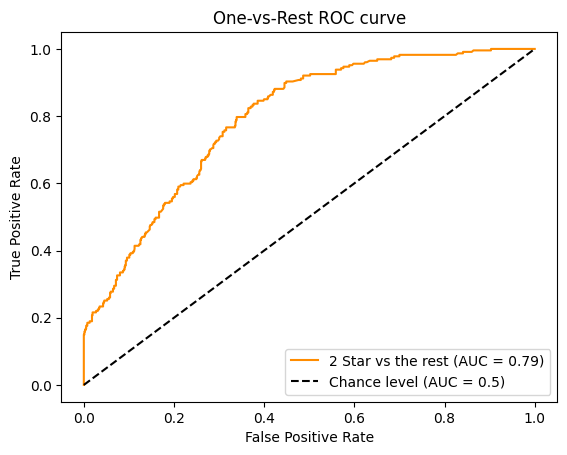

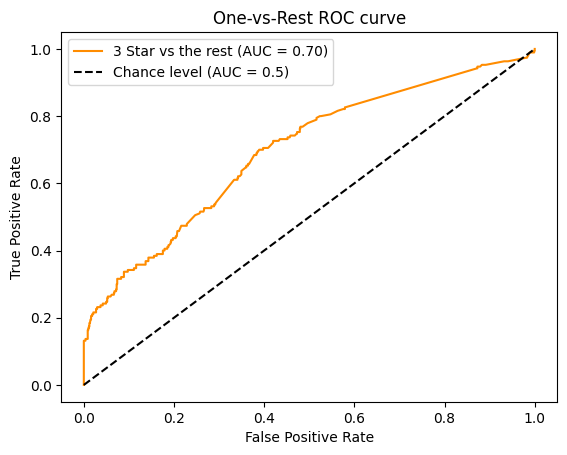

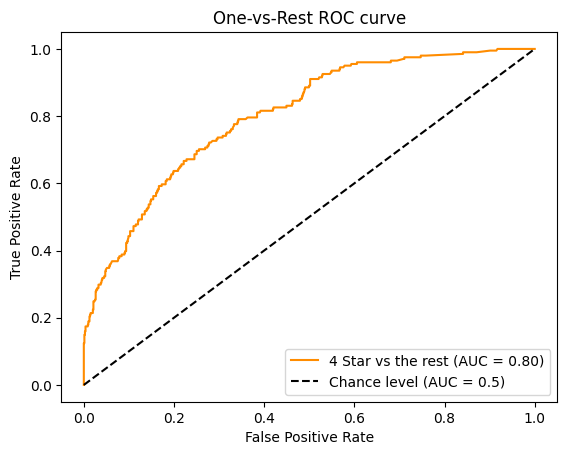

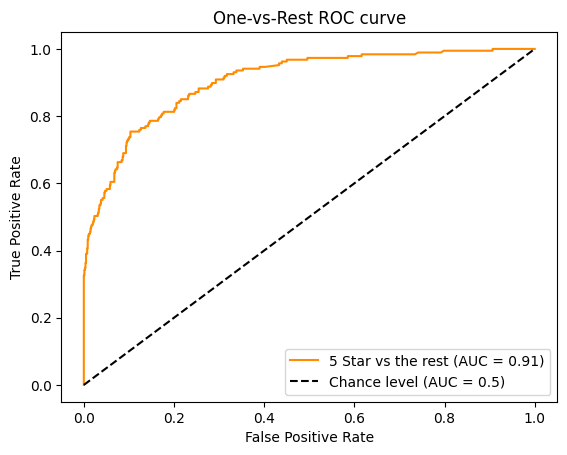

F1: 0.5223844020072981
Accuracy: 0.525


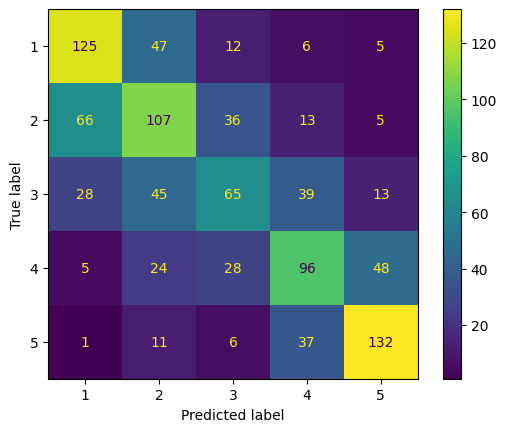

In [ ]:
#perform analysis with XGboost

#fit XGboost to training data with best hyperparameters determined and predict class probabilities on validation data
y_score = clf.fit(train_tf_sentiment[0:5000], y_train[0:5000]).decision_function(validation_tf_sentiment[0:1000])

#one vs all ROC curves
label_binarizer = LabelBinarizer().fit(y_train[0:1000])
y_onehot_test = label_binarizer.transform(y_validation[0:1000])


from sklearn.metrics import RocCurveDisplay

for class_of_interest in [1,2,3,4,5]:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} Star vs the rest",
        color="darkorange",
        plot_chance_level=True,
    )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curve")
    plt.legend()
    plt.show()

#make class predictions on validation set
y_predicted_rc = clf.predict(validation_tf_sentiment[0:1000])

#assess performance on validation set with confusion matrix, F1 score and accuracy
conf_matrix = confusion_matrix(y_validation[0:1000], y_predicted_rc)
f1_macro = f1_score(y_validation[0:1000], y_predicted_rc, average='macro')
accuracy = accuracy_score(y_validation[0:1000], y_predicted_rc)

ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_).plot()

print(f'F1: {f1_macro}')
print(f'Accuracy: {accuracy}')

## Final Submission Predictions

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
#count occurence of each word in review text and summary text
from sklearn.feature_extraction.text import CountVectorizer
count_vect_review = CountVectorizer()
count_vect_summary = CountVectorizer()
X_train_reviewText_counts = count_vect_review.fit_transform(train.reviewText)
X_train_summary_counts = count_vect_summary.fit_transform(train.summary.astype('U'))

#combine word counts into one matrix
from scipy.sparse import hstack
X_train_counts = hstack((X_train_reviewText_counts, X_train_summary_counts))

#convert word counts into frequencies
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

#convert validation data into word counts, combine into one matrix, then convert into term frequency
X_validation_reviewText_counts = count_vect_review.transform(test.reviewText)
X_validation_summary_counts = count_vect_summary.transform(test.summary.astype('U'))
X_validation_counts = hstack((X_validation_reviewText_counts, X_validation_summary_counts))
X_validation_tf = tf_transformer.transform(X_validation_counts)

In [ ]:
#sentiment analysis for training set

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import scipy

#load in sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#make a new column with the sentiment from reviews
X_train['sentiment'] = X_train['reviewText'].apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
X_train['positive_score'] = X_train['sentiment'].apply(lambda x: x['pos'])
X_train['negative_score'] = X_train['sentiment'].apply(lambda x: x['neg'])
X_train['neutral_score'] = X_train['sentiment'].apply(lambda x: x['neu'])
X_train['compound_score'] = X_train['sentiment'].apply(lambda x: x['compound'])

#make a new column with the sentiment from summary
X_train['sentiment_sum'] = X_train['summary'].astype('U').apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
X_train['positive_score_sum'] = X_train['sentiment_sum'].apply(lambda x: x['pos'])
X_train['negative_score_sum'] = X_train['sentiment_sum'].apply(lambda x: x['neg'])
X_train['neutral_score_sum'] = X_train['sentiment_sum'].apply(lambda x: x['neu'])
X_train['compound_score_sum'] = X_train['sentiment_sum'].apply(lambda x: x['compound'])

#select only necessary columns
X_train2 = X_train[['positive_score','negative_score','neutral_score','compound_score','positive_score_sum','negative_score_sum','neutral_score_sum','compound_score_sum']]
#add 1 to allow the Naive Bayes model to be fit (negative numbers don't work)
#this doesn't affect SVM's ability to find a linear boundary or XGBoost's ability to make hierarchal decisions
X_train2 = X_train2 + 1

#append these columns to the term frequency matrix
sparse_train2 = scipy.sparse.csr_matrix(X_train2)
train_tf_sentiment = hstack((X_train_tf, sparse_train2))

In [ ]:
#perform sentiment analyzer on entire training dataset

#load in sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#make a new column with the sentiment from reviews
train['sentiment'] = train['reviewText'].apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
train['positive_score'] = train['sentiment'].apply(lambda x: x['pos'])
train['negative_score'] = train['sentiment'].apply(lambda x: x['neg'])
train['neutral_score'] = train['sentiment'].apply(lambda x: x['neu'])
train['compound_score'] = train['sentiment'].apply(lambda x: x['compound'])

#make a new column with the sentiment from summary
train['sentiment_sum'] = train['summary'].astype('U').apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
train['positive_score_sum'] = train['sentiment_sum'].apply(lambda x: x['pos'])
train['negative_score_sum'] = train['sentiment_sum'].apply(lambda x: x['neg'])
train['neutral_score_sum'] = train['sentiment_sum'].apply(lambda x: x['neu'])
train['compound_score_sum'] = train['sentiment_sum'].apply(lambda x: x['compound'])

#select only necessary columns
train2 = train[['positive_score','negative_score','neutral_score','compound_score','positive_score_sum','negative_score_sum','neutral_score_sum','compound_score_sum']]
#add 1 to allow the Naive Bayes model to be fit (negative numbers don't work)
#this doesn't affect SVM's ability to find a linear boundary or XGBoost's ability to make hierarchal decisions
train2 = train2 + 1

#append these columns to the term frequency matrix
sparse_train2 = scipy.sparse.csr_matrix(train2)
train_tf_sentiment = hstack((X_train_tf, sparse_train2))

In [ ]:
#perform sentiment analyzer on testing dataset

#load in sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#make a new column with the sentiment from reviews
test['sentiment'] = test['reviewText'].apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
test['positive_score'] = test['sentiment'].apply(lambda x: x['pos'])
test['negative_score'] = test['sentiment'].apply(lambda x: x['neg'])
test['neutral_score'] = test['sentiment'].apply(lambda x: x['neu'])
test['compound_score'] = test['sentiment'].apply(lambda x: x['compound'])

#make a new column with the sentiment from summary
test['sentiment_sum'] = test['summary'].astype('U').apply(lambda x: analyzer.polarity_scores(x))

#extract each category of score and put them in their own column
test['positive_score_sum'] = test['sentiment_sum'].apply(lambda x: x['pos'])
test['negative_score_sum'] = test['sentiment_sum'].apply(lambda x: x['neg'])
test['neutral_score_sum'] = test['sentiment_sum'].apply(lambda x: x['neu'])
test['compound_score_sum'] = test['sentiment_sum'].apply(lambda x: x['compound'])

#select only necessary columns
test2 = test[['positive_score','negative_score','neutral_score','compound_score','positive_score_sum','negative_score_sum','neutral_score_sum','compound_score_sum']]
#add 1 to allow the Naive Bayes model to be fit (negative numbers don't work)
#this doesn't affect SVM's ability to find a linear boundary or XGBoost's ability to make hierarchal decisions
test2 = test2 + 1

#append these columns to the term frequency matrix
sparse_train2 = scipy.sparse.csr_matrix(test2)
validation_tf_sentiment = hstack((X_validation_tf, sparse_train2))

In [ ]:
#load in the final answers to train with
final_y = train['overall']

#train the 3 best models
mnb = MultinomialNB(alpha = 0.03)
final_mnb = mnb.fit(train_tf_sentiment, np.array(final_y))

svm = LinearSVC(penalty = 'l2', loss = 'squared_hinge')
final_svm = svm.fit(train_tf_sentiment, np.array(final_y))

rc = RidgeClassifier(alpha = 1.0)
final_rc = rc.fit(train_tf_sentiment,np.array(final_y))

/Users/pepea/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
#predict on testing data using the 3 best models
predicted_mnb = mnb.predict(validation_tf_sentiment)
predicted_svm = svm.predict(validation_tf_sentiment)
predicted_rc = rc.predict(validation_tf_sentiment)

#average them
avg_predicted = np.around((predicted_mnb + predicted_svm + predicted_rc)/3)

In [ ]:
#read ids to submit with
ids = pd.read_csv('test.csv').id

In [ ]:
#submit!
submission = pd.DataFrame({"id": ids, "pred": avg_predicted.astype(int)})
submission.to_csv('alecbuetow_text_and_sentiment.csv', index=False)